In [1]:
import os
import numpy as np
import pandas as pd
from random import sample
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [2]:
path = '..\\..\\..\\Miscellaneous'
os.chdir(path)
cases = pd.read_csv('corona_tested_20201115.csv', \
                    dtype={"test_date": "string", "cough": int, "fever": int, \
                           "sore_throat": int, "shortness_of_breath": int, "head_ache": int, \
                           "corona_result": "string", "age_60_and_above": "string", "gender": "string", \
                           "test_indication":"string"})
del cases['test_date']


In [3]:
cases.head(10)

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,0,0,0,0,0,negative,No,male,Other
1,0,1,0,0,0,negative,No,male,Other
2,0,0,0,0,0,negative,Yes,female,Other
3,0,0,0,0,0,negative,No,male,Other
4,0,1,0,0,0,negative,No,male,Contact with confirmed
5,1,0,0,0,0,negative,No,male,Other
6,1,1,0,0,0,negative,No,male,Other
7,0,0,0,0,0,negative,No,female,Contact with confirmed
8,0,0,0,0,0,negative,No,male,Other
9,1,1,0,0,0,negative,No,male,Other


In [4]:
symptoms = ["cough", "fever", "sore_throat", "shortness_of_breath", "head_ache"]
for col in symptoms:
    cases[col] = np.where(cases[col] == 1, col, 'None')
cases['age_60_and_above'] = ['age_60_and_above_' + s for s in cases['age_60_and_above']]
cases['test_indication'] = ['test_indication_' + s for s in cases['test_indication']]
cases['corona_result'] = ['corona_result_' + s for s in cases['corona_result']]

# onehot encode all of the categorical variables
# after one-hot coding a variable, we delete the original (unencoded) variable

for v in cases.columns:
    onehot = pd.get_dummies(cases[v])
#    print(onehot)
    if 'None' in list(onehot.columns): onehot.drop('None', inplace=True, axis=1)
#    if 'Other' in list(onehot.columns): onehot.drop('Other', inplace=True, axis=1)
    cases.drop(v, inplace=True, axis=1)
    cases = cases.join(onehot)

# view the preprocessed dataset (do a visual check for correctness)
cases.columns
cases

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result_negative,corona_result_other,corona_result_positive,age_60_and_above_No,age_60_and_above_Yes,female,male,test_indication_Abroad,test_indication_Contact with confirmed,test_indication_Other
0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1
1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1
2,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1
3,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1
4,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742591,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
2742592,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
2742593,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
2742594,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1


In [5]:
# pruning unneccessary features
del cases['corona_result_negative']
del cases['corona_result_other']
del cases['age_60_and_above_No']
del cases['male']
del cases['test_indication_Abroad']
del cases['test_indication_Contact with confirmed']
del cases['test_indication_Other']

In [6]:
cases.head(10)

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result_positive,age_60_and_above_Yes,female
0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0
6,1,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0


              precision    recall  f1-score   support

           0       0.94      0.99      0.96    504365
           1       0.68      0.27      0.39     44154

    accuracy                           0.93    548519
   macro avg       0.81      0.63      0.67    548519
weighted avg       0.92      0.93      0.92    548519

[[498896   5469]
 [ 32271  11883]]


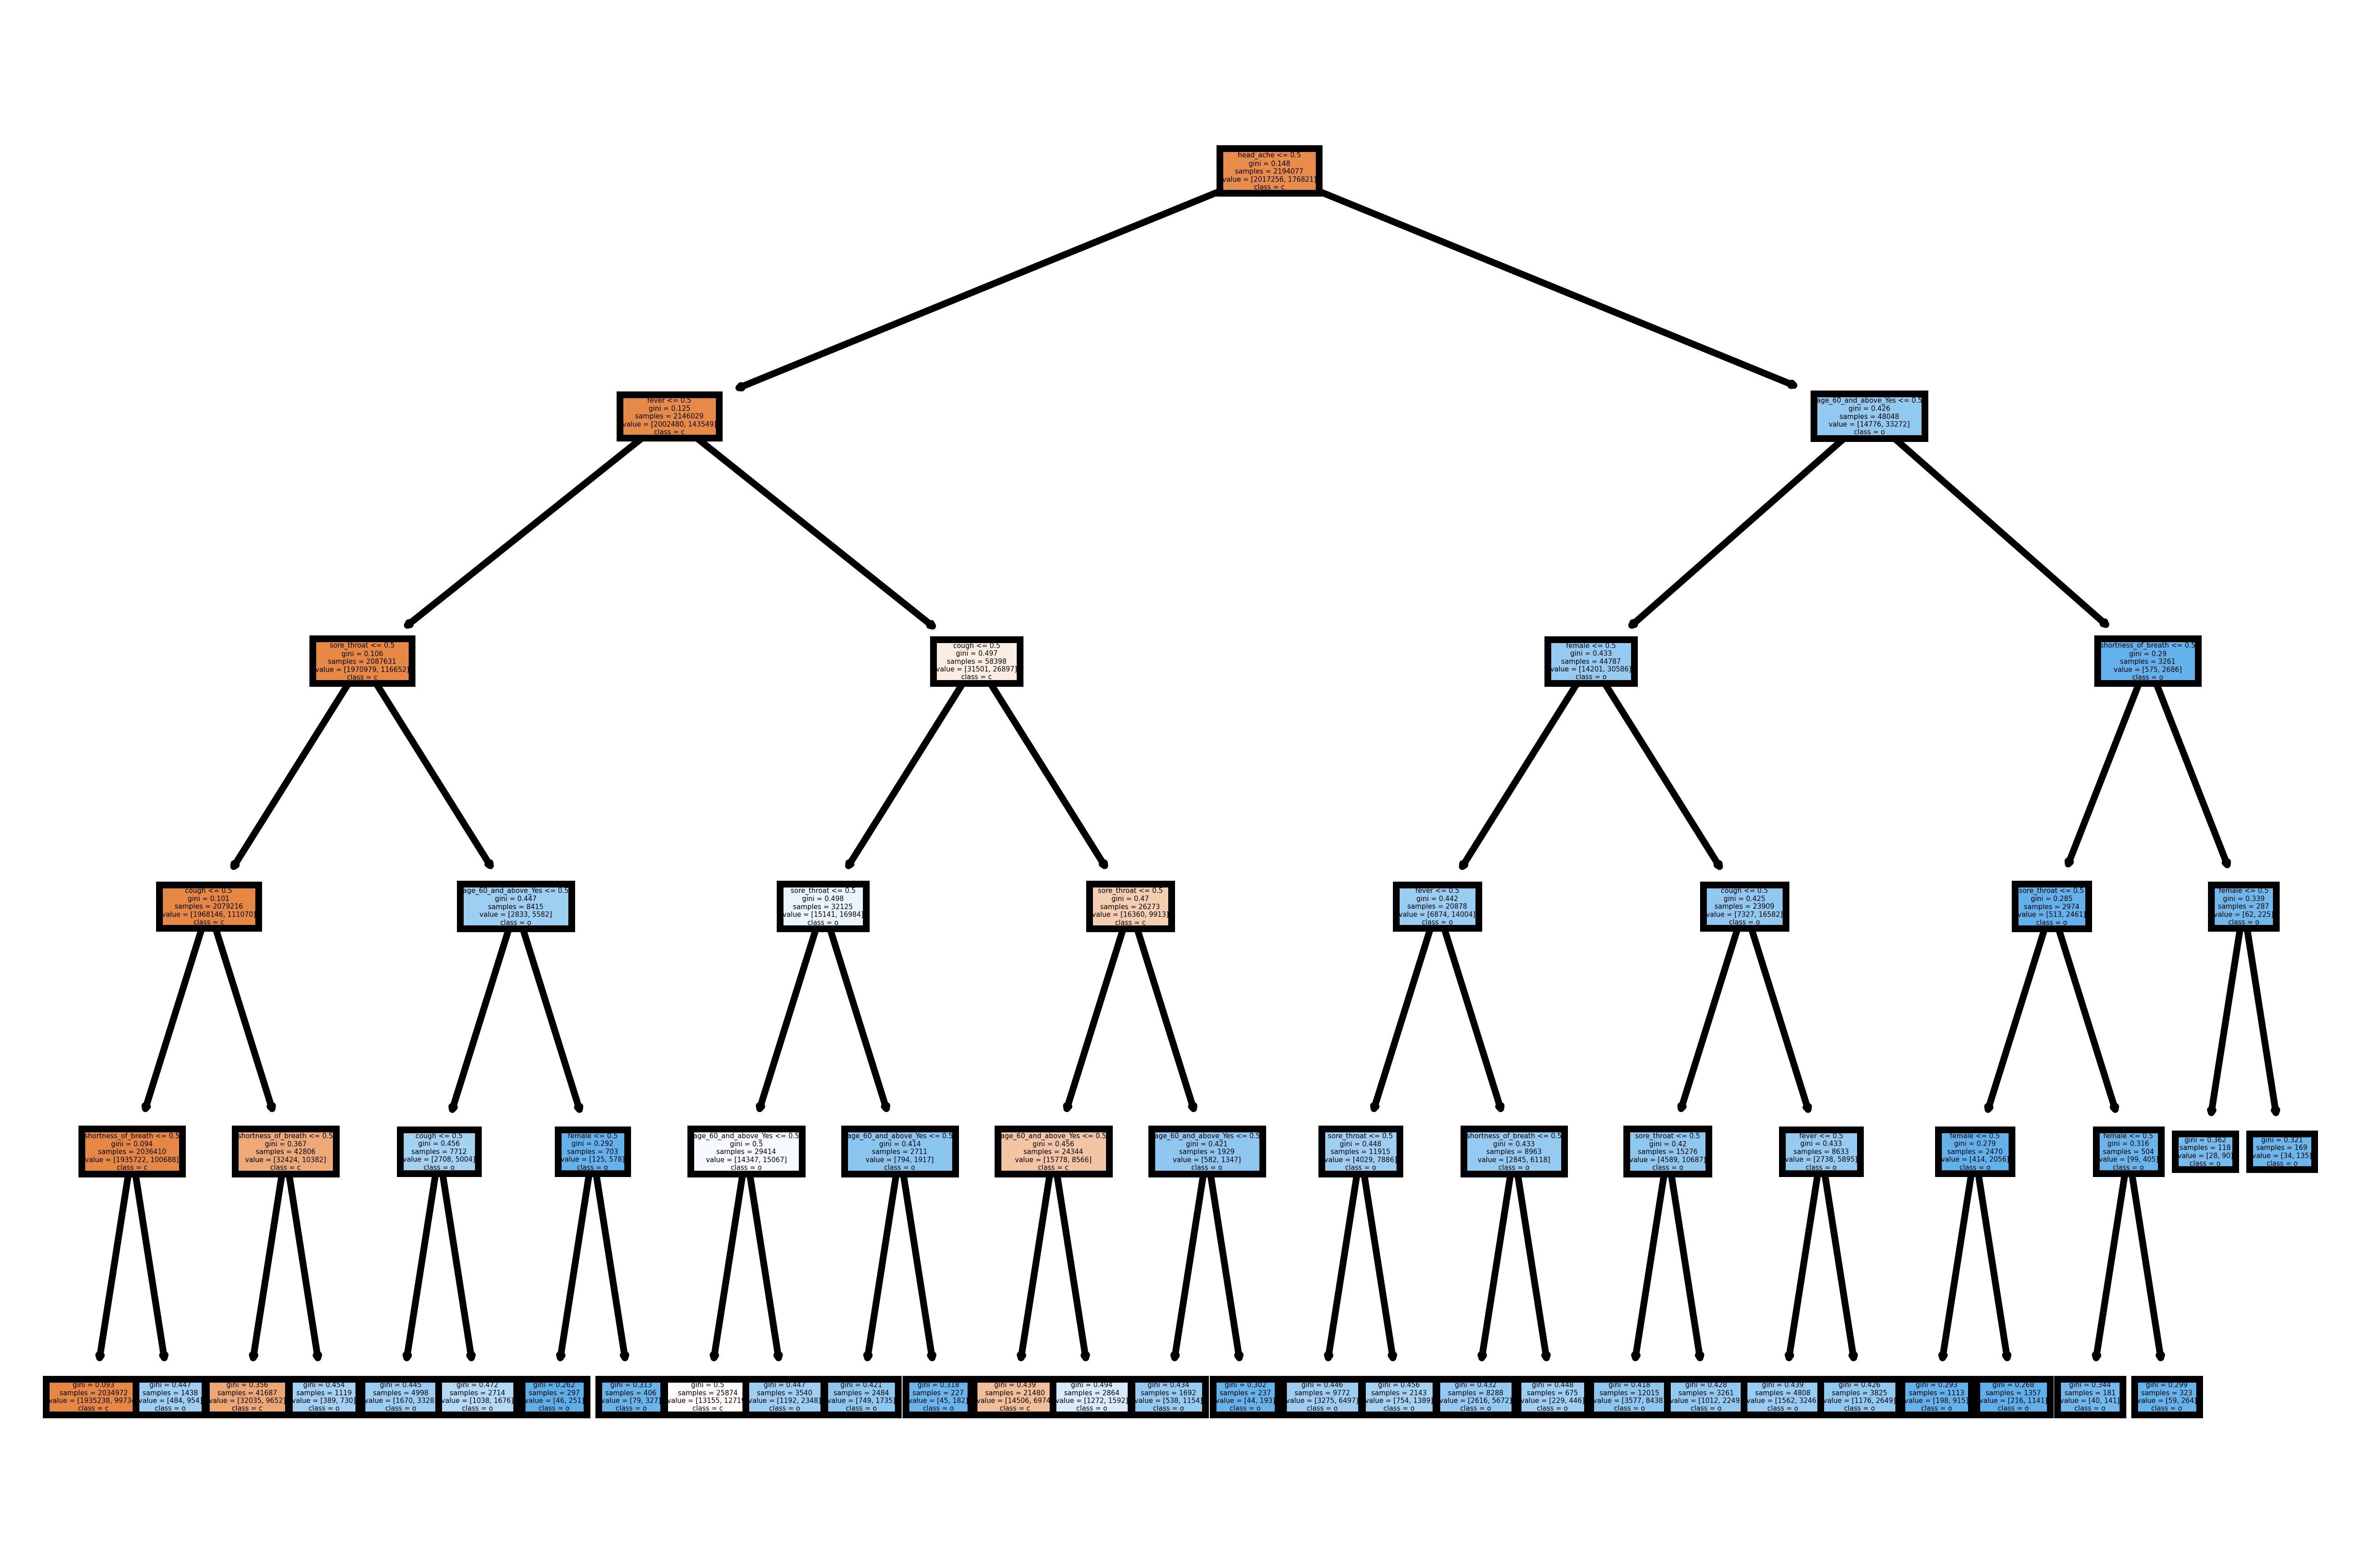

In [20]:
# (step2) Build and test a decision tree for one item, with no pruning

# create train and test split
testsize = int(len(cases) * 0.2);
testsize  # set the size of the test set (20%)
testnames = set(sample(list(cases.index), testsize));
len(testnames)
trainnames = set(cases.index) - testnames;
len(trainnames)
train = cases.loc[trainnames,];
train.shape
test = cases.loc[testnames];
test.shape

# build the decision tree
target = 'corona_result_positive'  # select the target item, any item will do
inputvars = list(set(cases.columns) - set([target]))
tclf = tree.DecisionTreeClassifier(min_samples_leaf=100,max_depth=5)
tclf.fit(train[inputvars], train[target])


# view the tree method
plt.rcParams['figure.dpi'] = 1080  # adjust to get the plot resolution you want
_ = tree.plot_tree(tclf, feature_names=inputvars, class_names=target, filled=True)

# test the tree
preds = tclf.predict(test[inputvars])
print(classification_report(test[target], preds))
print(confusion_matrix(test[target], preds))  # rows = actual, cols = preds, eg precision for class 0 = (0,0)/((0,0)+(1,0))



In [21]:
print(target, 'tree size=', tclf.tree_.node_count)  # size of the tree
text_representation = tree.export_text(tclf, feature_names=inputvars) 
print(text_representation)

corona_result_positive tree size= 59
|--- head_ache <= 0.50
|   |--- fever <= 0.50
|   |   |--- sore_throat <= 0.50
|   |   |   |--- cough <= 0.50
|   |   |   |   |--- shortness_of_breath <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- shortness_of_breath >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- cough >  0.50
|   |   |   |   |--- shortness_of_breath <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- shortness_of_breath >  0.50
|   |   |   |   |   |--- class: 1
|   |   |--- sore_throat >  0.50
|   |   |   |--- age_60_and_above_Yes <= 0.50
|   |   |   |   |--- cough <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- cough >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- age_60_and_above_Yes >  0.50
|   |   |   |   |--- female <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- female >  0.50
|   |   |   |   |   |--- class: 1
|   |--- fever >  0.50
|   |   |--- cough <= 0.50
|   |   |   |--- sore_throat <= 0.50


In [18]:
import pickle
# save the model to disk
filename = 'decision_tree_model.pkl'
pickle.dump(tclf, open(filename, 'wb'))



In [22]:
# test the model
array = np.array([[1, 0, 0, 0, 0, 1, 0, 0, 1, 0]])
   
# creating a list of column names
column_values = ['cough', 'sore_throat', 'test_indication_Abroad', \
                 'shortness_of_breath', 'fever', 'test_indication_Contact with confirmed', \
                 'age_60_and_above_Yes', 'test_indication_Other', 'female', 'head_ache']

# creating the dataframe
df = pd.DataFrame(data = array, 
                  columns = column_values)
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(df)
print(result)


[0]
